Init

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3


def python2sqlite(x):
    if x.startswith("int"):
        return "integer"
    if x.startswith("float"):
        return "real"
    return "text"


def records2columns(rows):
    if not rows:
        return []
    return [list(map(lambda x: x[i], rows)) for i in range(len(rows[0]))]


def get_size_table(db):
    db_cursor = db.cursor()
    db_cursor.execute(f"select count(*) from survey")
    return db_cursor.fetchone()[0]

Task A

In [2]:
columns = [
    "EmploymentField", 
    "EmploymentStatus", 
    "Gender", 
    "JobPref", 
    "JobWherePref", 
    "MaritalStatus", 
    "Income"
]

data = pd.read_csv("survey.csv", usecols=columns)

db_connection = sqlite3.connect("survey.db")
db_cursor = db_connection.cursor()

body = ", ".join(
    map(" ".join, zip(data.columns, data.dtypes.apply(lambda x: python2sqlite(x.name))))
)

db_cursor.execute(f"create table survey ({body})")

db_connection.commit()

Task B

In [3]:
db_cursor.executemany(
    f"insert into survey ({','.join(data.columns)}) values (?, ?, ?, ?, ?, ?, ?)",
    data.values
)

db_connection.commit()

print("size =", get_size_table(db_connection))

size = 15620


Task C

In [4]:
db_cursor.execute("""
    delete from survey
    where EmploymentField is null
        or EmploymentStatus is null
        or Gender is null
        or Gender not in ('female', 'male')
        or JobPref is null
        or JobWherePref is null
        or MaritalStatus is null
        or Income is null
        or Income < 0
""")

db_connection.commit()

print("size =", get_size_table(db_connection))

size = 764


Task D

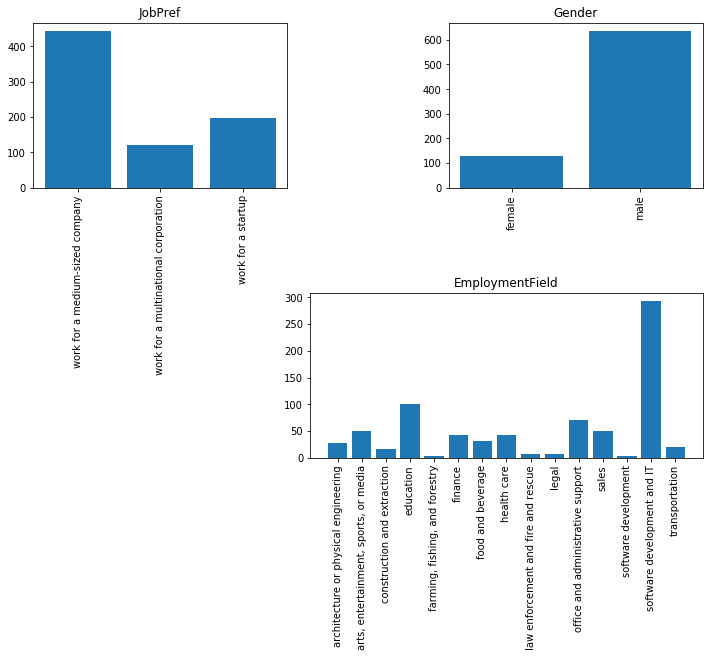

In [5]:
plt.figure(figsize=(12, 8))
axs = [
    plt.subplot2grid((5, 5), (0, 0), colspan=2, rowspan=2),
    plt.subplot2grid((5, 5), (0, 3), colspan=2, rowspan=2),
    plt.subplot2grid((5, 5), (3, 2), colspan=3, rowspan=2)
]

for i, col in enumerate(("JobPref", "Gender", "EmploymentField")):
    db_cursor.execute(f"""
        select {col}, count(*) 
        from survey 
        group by {col}
    """)
    
    axs[i].set_title(col)
    axs[i].tick_params(axis="x", labelrotation=90)
    axs[i].bar(*records2columns(db_cursor.fetchall()))

Task E

In [6]:
db_cursor.execute("""
    delete from survey 
    where exists (
        select *
        from survey 
        group by JobPref, Gender
            having 50 * count(*) < (select count(*) from survey)
    )
""")

db_connection.commit()

print("size =", get_size_table(db_connection))

size = 764


Task F

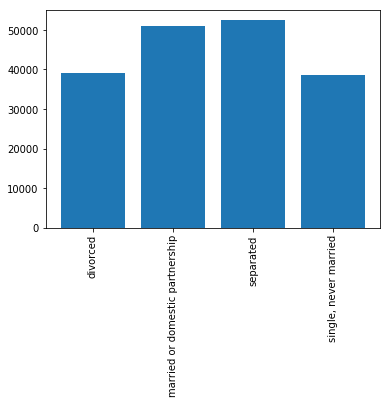

In [7]:
db_cursor.execute("""
    select MaritalStatus, avg(Income) 
    from survey 
    group by MaritalStatus
""")

plt.bar(*records2columns(db_cursor.fetchall()))
plt.tick_params(axis="x", labelrotation=90)

Task G

In [8]:
# NotImplemented

Finish

In [9]:
db_connection.close()